# Code for analysis / figure generation of Bellet et al. 2018

In [1]:
import numpy as np
import os
from os.path import join as pj
from matplotlib.pyplot import *
import uneye
from sklearn.metrics import cohen_kappa_score as cohenskappa
import scipy.io as io
import pandas as pd

# Compare performance of algorithms on datasets 1-3
Comparison against Coder 1

In [2]:
import pandas as pd
import numpy as np

##########################
# U'n'Eye CV performance #
##########################

K = 10 #10-fold cross-validation
df = pd.DataFrame(columns=['ID','fold','kappa','f1','on_dist','off_dist'])
df_human = pd.DataFrame(columns=['ID','fold','kappa','f1','on_dist','off_dist'])
folders = ['dataset1','dataset2','dataset3']
sampfreq = [1000,1000,500]
min_dist = [10,5,10]
min_sacc_dur = 6
Ntrain = [950,950,330]
for idata,f in enumerate(folders):
    
    ntrain = Ntrain[idata]
    fac = 1000/sampfreq[idata]
    datapath = os.path.join('../data',f)
    print(datapath)
    
    # load training data
    X = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq[idata])+'hz_X_setA.csv',delimiter=',')
    Y = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq[idata])+'hz_Y_setA.csv',delimiter=',')
    L = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq[idata])+'hz_Labels_setA.csv',delimiter=',')
    if f == 'dataset1':
        # load labels from coder2
        L2 = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq[idata])+'hz_Labels2_setA.csv',delimiter=',')
        
    # split data into subsets as used for cross-validation of U'n'Eye:
    np.random.seed(1)
    randind = np.random.permutation(X.shape[0])
    # used as training data
    Xtrain = X[randind[:ntrain],:]
    Ytrain = Y[randind[:ntrain],:]
    Ltrain = L[randind[:ntrain],:]
    if f =='dataset1':
        Ltrain2 = L2[randind[:ntrain],:]
    
    # chose subset that was not used for training for each crossvalidation
    n_test = int(ntrain/K)
    np.random.seed(1) # fixed seed for comparable cross validations
    indices = np.random.permutation(ntrain)
     
    for i in range(K):
        if i==K-1:
            ind_test = indices[n_test*i:]
        else:
            ind_test = indices[n_test*i:n_test*(i+1)]
        # test set
        Xtest = Xtrain[ind_test,:].copy()
        Ytest = Ytrain[ind_test,:].copy()
        Ltest = Ltrain[ind_test,:].copy()
        if f == 'dataset1':
            Ltest2 = Ltrain2[ind_test,:].copy()

        # load corresponding weights of cv fold:
        model = uneye.DNN(weights_name='crossvalidation/'+f+'/crossvalidation_'+str(i),
                        min_sacc_dur = min_sacc_dur, min_sacc_dist = min_dist[idata],
                        sampfreq = sampfreq[idata])
        # predict saccades
        pred,prob,perf = model.test(Xtest,Ytest,Ltest)
        

        df = df.append({'ID':f,
                        'fold':i,
                        'kappa':perf['kappa'],
                        'f1':perf['f1'],
                        'on_dist':np.mean(np.abs(perf['on']))*fac,
                        'off_dist':np.mean(np.abs(perf['off']))*fac},ignore_index=True) 
        #Note: scale onset and offset distance with sampfreq
        if f == 'dataset1': #for dataset1, compare inter-rater performance
        
            # compare coder 1 against coder 2
            kappa = cohenskappa(Ltest.astype(float).flatten(),Ltest2.astype(float).flatten())
            true_pos,false_pos,false_neg,on_distance,off_distance = uneye.functions.accuracy(Ltest.astype(float),Ltest2.astype(float))
            f1 = (2 * true_pos)/(2 * true_pos + false_neg + false_pos)  
            on = np.mean(np.abs(on_distance))*fac
            off = np.mean(np.abs(off_distance))*fac
            
            df_human = df_human.append({'ID':f,
                        'fold':i,
                        'kappa':kappa,
                        'f1':f1,
                        'on_dist':on,
                        'off_dist':off},ignore_index=True)


# average over crossvalidations
df2 = pd.DataFrame(columns=['ID','kappa_m','kappa_std','f1_m','f1_std',
                            'on_dist_m','on_dist_std',
                            'off_dist_m','off_dist_std'])

for k in folders:
    df2 = df2.append({'ID':k,
                     'kappa_m':df[df['ID']==k]['kappa'].mean(),
                      'kappa_std':df[df['ID']==k]['kappa'].std(),
                      'f1_m':df[df['ID']==k]['f1'].mean(),
                      'f1_std':df[df['ID']==k]['f1'].std(),
                      'on_dist_m':np.abs(df[df['ID']==k]['on_dist']).mean(),
                      'on_dist_std':np.abs(df[df['ID']==k]['on_dist']).std(),
                      'off_dist_m':np.abs(df[df['ID']==k]['off_dist']).mean(),
                      'off_dist_std':np.abs(df[df['ID']==k]['off_dist']).std(),
                     },ignore_index=True)
    
print("Averaged scores for U'n'Eye")
display(df2)

print("Agreement of coder 1 and 2")
display(df_human)

../data/dataset1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:1946: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


Binary Cohens Kappa:  0.884
F1: 0.962
Binary Cohens Kappa:  0.905
F1: 0.966
Binary Cohens Kappa:  0.881
F1: 0.953
Binary Cohens Kappa:  0.899
F1: 0.977
Binary Cohens Kappa:  0.871
F1: 0.949
Binary Cohens Kappa:  0.899
F1: 0.947
Binary Cohens Kappa:  0.855
F1: 0.953
Binary Cohens Kappa:  0.903
F1: 0.973
Binary Cohens Kappa:  0.904
F1: 0.965
Binary Cohens Kappa:  0.915
F1: 0.978
../data/dataset2
Binary Cohens Kappa:  0.913
F1: 0.944
Binary Cohens Kappa:  0.922
F1: 0.976
Binary Cohens Kappa:  0.922
F1: 0.941
Binary Cohens Kappa:  0.911
F1: 0.951
Binary Cohens Kappa:  0.932
F1: 0.975
Binary Cohens Kappa:  0.946
F1: 0.977
Binary Cohens Kappa:  0.911
F1: 0.942
Binary Cohens Kappa:  0.913
F1: 0.969
Binary Cohens Kappa:  0.929
F1: 0.968
Binary Cohens Kappa:  0.913
F1: 0.952
../data/dataset3
Binary Cohens Kappa:  0.83
F1: 0.946
Binary Cohens Kappa:  0.776
F1: 0.925
Binary Cohens Kappa:  0.814
F1: 0.935
Binary Cohens Kappa:  0.826
F1: 0.951
Binary Cohens Kappa:  0.808
F1: 0.934
Binary Cohens Kap

,ID,kappa_m,kappa_std,f1_m,f1_std,on_dist_m,on_dist_std,off_dist_m,off_dist_std
0,dataset1,0.891790,0.018429,0.962253,0.011673,2.656528,0.338675,4.108999,0.407164
1,dataset2,0.921353,0.011470,0.959444,0.014793,1.697520,0.289349,2.189707,0.372963
2,dataset3,0.816715,0.018517,0.939127,0.011632,2.229585,0.222350,3.988772,0.595093


Agreement of coder 1 and 2


,ID,fold,kappa,f1,on_dist,off_dist
0,dataset1,0,0.835380,0.964497,4.055215,7.098160
1,dataset1,1,0.847079,0.965909,2.964706,7.100000
2,dataset1,2,0.823443,0.978852,3.611111,6.901235
3,dataset1,3,0.845063,0.979943,4.187135,6.994152
4,dataset1,4,0.815050,0.974930,3.314286,7.417143
5,dataset1,5,0.835457,0.983333,3.666667,7.683616
6,dataset1,6,0.767944,0.953216,3.981595,7.269939
7,dataset1,7,0.840935,0.986450,3.994505,6.450549
8,dataset1,8,0.845973,0.985075,3.957576,6.842424
9,dataset1,9,0.846980,0.994475,3.472222,7.205556


One dataframe for all algorithms
- U'n'Eye
- Engbert & Mergenthaler
- Pekkanen & Lappi
- Sheynikhovich et al.
- Otero-Millan et al.
- Daye & Optican


In [3]:
import pandas as pd
import numpy as np

folders = ['dataset1','dataset2','dataset3']
df3 = pd.DataFrame(columns=['Algorithm','fold','ID','kappa','f1','on_dist','off_dist'])

# U'n'Eye -------------------------------------------------
for ind,row in df.iterrows():
    df3 = df3.append({'Algorithm':'uneye',
           'ID':row['ID'],
           'fold':row['fold'],
           'kappa':row['kappa'],
           'f1':row['f1'],
           'on_dist':row['on_dist'],
           'off_dist':row['off_dist'],},ignore_index=True)

# human (only dataset1) -------------------------------------------------
for ind,row in df_human.iterrows():
    df3 = df3.append({'Algorithm':'human',
           'ID':row['ID'],
           'fold':row['fold'],
           'kappa':row['kappa'],
           'f1':row['f1'],
           'on_dist':row['on_dist'],
           'off_dist':row['off_dist'],},ignore_index=True)

# EM algorithm (performance values stored during cross validation) -------------------------------------------------
# maximized for cohen's kappa
for i,f in enumerate(folders):
    fac = 1000/sampfreq[i]
    perf = np.load('summary/crossvalidation/em_'+f+'.npy').item()
    for i in range(10):
        if f!='dataset2':
             df3 = df3.append({'Algorithm':'em',
             'ID':f,
            'fold':i,
             'kappa':perf['kappa'][i],
             'f1':perf['f1'][i],
             'on_dist':np.mean(np.abs(perf['on'][i])*fac),
             'off_dist':np.mean(np.abs(perf['off'][i]))*fac},ignore_index=True)
        else:
            df3 = df3.append({'Algorithm':'em',
             'ID':f,
            'fold':i,
            'kappa':np.nan,
             'f1':np.nan,
            'on_dist':np.nan,
            'off_dist':np.nan},ignore_index=True) 
#maximized for f1            
for i,f in enumerate(folders):
    fac = 1000/sampfreq[i]
    perf = np.load('summary/crossvalidation/em_'+f+'.npy').item()
    for i in range(10):
        if f!='dataset2':
            df3 = df3.append({'Algorithm':'em_best_lambda_for_f1',
                 'ID':f,
                'fold':i,
                 'kappa':perf['kappa_lam_f1'][i],
                 'f1':perf['F1_lam_f1'][i],
                 'on_dist':np.mean(np.abs(perf['on_lam_f1'][i])*fac),
                 'off_dist':np.mean(np.abs(perf['off_lam_f1'][i]))*fac},ignore_index=True)
        else:
            df3 = df3.append({'Algorithm':'em_best_lambda_for_f1',
             'ID':f,
            'fold':i,
            'kappa':np.nan,
             'f1':np.nan,
            'on_dist':np.nan,
            'off_dist':np.nan},ignore_index=True) 

# NSLR-HMM, Otero-Millan, Daye & Optican and Sheynikovich algorithm -------------------------------------------------

folder_others = 'predictions_other_algorithms'

# daye & optican: only dataset2
Ldo = np.loadtxt(os.path.join(folder_others,'DayeOptican','dataset2','Labels.csv'),
                          delimiter=',')

for idata,f in enumerate(folders):
    
    ntrain = Ntrain[idata]
    fac = 1000/sampfreq[idata]
    datapath = os.path.join('../data',f)
    print(datapath)
    # load original data
    X = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq[idata])+'hz_X_setA.csv',delimiter=',')
    Y = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq[idata])+'hz_Y_setA.csv',delimiter=',')
    L = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq[idata])+'hz_Labels_setA.csv',delimiter=',') 
    np.random.seed(1)
    randind = np.random.permutation(X.shape[0])
    # used as training data
    Xtrain = X[randind[:ntrain],:]
    Ytrain = Y[randind[:ntrain],:]
    Ltrain = L[randind[:ntrain],:] 
    # chose subset that was not used for training for each crossvalidation
    n_test = int(ntrain/K)
    np.random.seed(1) # fixed seed for comparable cross validations
    indices = np.random.permutation(ntrain)
    
    # Sheynikovich ------------------------------------------
    Lshey = np.loadtxt(os.path.join(folder_others,'Sheynikhovich',f+'_setA_Sheynikhovich_Labels.csv'),
                          delimiter=',')
    Lshey = Lshey[randind[:ntrain],:]
    
    
    # Otero-Millan
    if ((f=='dataset1') or (f=='dataset3')):
        Lom = np.loadtxt(os.path.join(folder_others,'OteroMillan',f+'setALabels.csv'),
                          delimiter=',')
        Lom = Lom[randind[:ntrain],:]  
    elif f=='dataset2':
        Ldo = Ldo[randind[:ntrain],:]
    # loop through folds of cross-validation
    for i in range(K):
        if i==K-1:
            ind_test = indices[n_test*i:]
        else:
            ind_test = indices[n_test*i:n_test*(i+1)]
            
            
        # test set
        Xtest = Xtrain[ind_test,:].copy()
        Ytest = Ytrain[ind_test,:].copy()
        Ltest = Ltrain[ind_test,:].copy()
        
        # Sheynikhovich
        Lshey_test = Lshey[ind_test,:].copy()
        true_pos,false_pos,false_neg,on_distance,off_distance = uneye.functions.accuracy(Ltest.astype(float),Lshey_test.astype(float))
        f1 = (2 * true_pos)/(2 * true_pos + false_neg + false_pos)  
        
        df3 = df3.append({'Algorithm':'Shey',
             'ID':f,
            'fold':i,
             'kappa':np.nan,
             'f1':f1,
            'on_dist':np.nan,
            'off_dist':np.nan},ignore_index=True)
        
        # NSLR-HMM: saved during cross-validation
        
        Lnslr_test = np.genfromtxt(os.path.join(folder_others,'nslr_hmm',f+'_nslr_Labels_cv_'+str(i)+'.csv'))
        kappa = cohenskappa(Ltest.astype(float).flatten(),Lnslr_test.astype(float).flatten())
        true_pos,false_pos,false_neg,on_distance,off_distance = uneye.functions.accuracy(Ltest.astype(float),Lnslr_test.astype(float))
        f1 = (2 * true_pos)/(2 * true_pos + false_neg + false_pos)  
        on = np.mean(np.abs(on_distance))*fac
        off = np.mean(np.abs(off_distance))*fac
        
        df3 = df3.append({'Algorithm':'nslr-hmm',
             'ID':f,
            'fold':i,
            'kappa':kappa,
             'f1':f1,
            'on_dist':on,
            'off_dist':off},ignore_index=True)  
       
        
        # Daye & Optican
        if f=='dataset2': #only dataset2
            
            Ldo_test = Ldo[ind_test,:].copy()
            kappa = cohenskappa(Ltest.astype(float).flatten(),Ldo_test.astype(float).flatten())
            true_pos,false_pos,false_neg,on_distance,off_distance = uneye.functions.accuracy(Ltest.astype(float),Ldo_test.astype(float))
            f1 = (2 * true_pos)/(2 * true_pos + false_neg + false_pos)  
            on = np.mean(np.abs(on_distance))*fac
            off = np.mean(np.abs(off_distance))*fac

            
            df3 = df3.append({'Algorithm':'do',
                 'ID':f,
                'fold':i,
                'kappa':kappa,
                 'f1':f1,
                'on_dist':on,
                'off_dist':off},ignore_index=True) 
            
        # Otero-Millan
        if ((f=='dataset1') or (f=='dataset3')): #only dataset 1
            Lom_test = Lom[ind_test,:].copy()
            kappa = cohenskappa(Ltest.astype(float).flatten(),Lom_test.astype(float).flatten())
            true_pos,false_pos,false_neg,on_distance,off_distance = uneye.functions.accuracy(Ltest.astype(float),Lom_test.astype(float))
            f1 = (2 * true_pos)/(2 * true_pos + false_neg + false_pos)  
            on = np.mean(np.abs(on_distance))*fac
            off = np.mean(np.abs(off_distance))*fac
            
            df3 = df3.append({'Algorithm':'om',
                 'ID':f,
                'fold':i,
                'kappa':kappa,
                 'f1':f1,
                'on_dist':on,
                'off_dist':off},ignore_index=True) 
       

../data/dataset1
../data/dataset2
../data/dataset3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x >

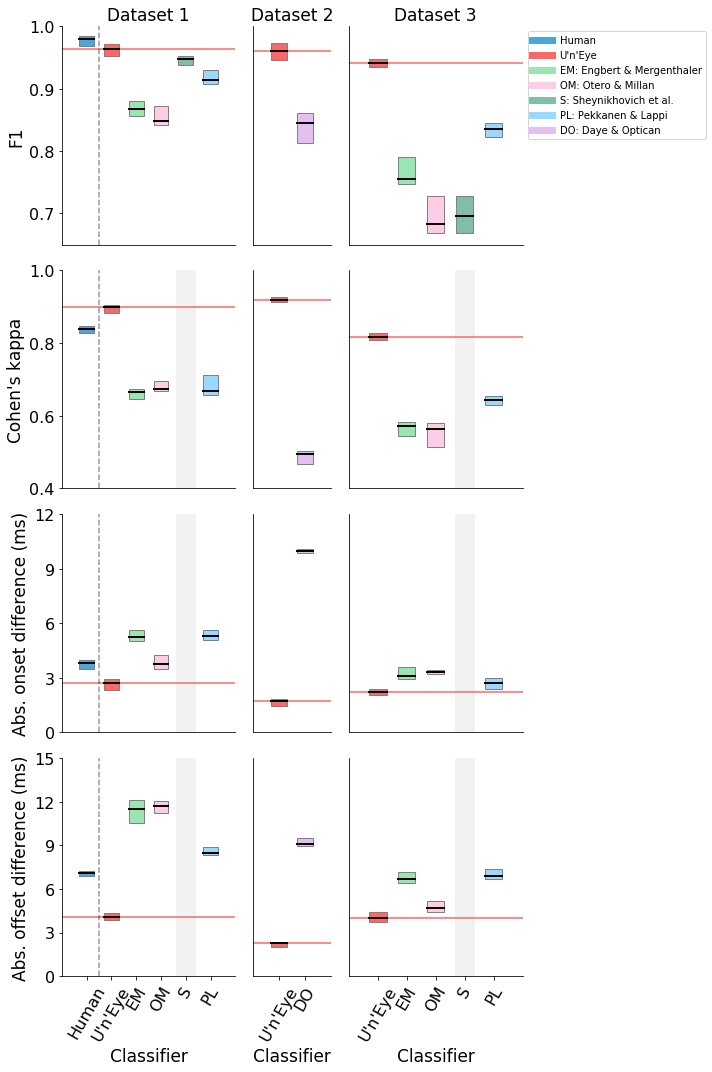

,algorithm,dataset,value,mean,std
0,human,dataset1,f1,0.976668,0.012294
1,uneye,dataset1,f1,0.962253,0.011673
2,em_best_lambda_for_f1,dataset1,f1,0.865479,0.027434
3,om,dataset1,f1,0.850287,0.030238
4,Shey,dataset1,f1,0.945910,0.017572
5,nslr-hmm,dataset1,f1,0.917691,0.015438
6,uneye,dataset2,f1,0.959444,0.014793
7,do,dataset2,f1,0.837382,0.034390
8,uneye,dataset3,f1,0.939127,0.011632
9,em_best_lambda_for_f1,dataset3,f1,0.772803,0.042045


In [4]:
# plot performances

from matplotlib.pyplot import *
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

value = ['f1','kappa','on_dist','off_dist']
df_averaged = pd.DataFrame(columns=['algorithm','dataset','value','mean','std'])
algorithms = ['human','uneye','em_best_lambda_for_f1','em','om','Shey','nslr-hmm','do']
colors = [
    
    [0.3,0.65,0.85],
    [1,0.4,0.4],
    [0.6,0.9,0.7],
    [0.6,0.9,0.7],
    [1,0.8,0.9],
    [0.5,0.75,0.65],
    [0.6,0.85,1],
     [0.9,0.75,0.95],
    
]
labels = ['Human',"U'n'Eye",'EM ','EM','OM','S','PL','DO']
labels_long = ['Human',"U'n'Eye",'EM: Engbert & Mergenthaler','EM: Engbert & Mergenthaler',
               'OM: Otero & Millan','S: Sheynikhovich et al.','PL: Pekkanen & Lappi','DO: Daye & Optican']
legend_ind = [0,1,2,4,5,6,7]
y = ["F1","Cohen's kappa","Abs. onset difference (ms)","Abs. offset difference (ms)"]
a1_f1 = [0,1,2,4,5,6] #algorithms for dataset1
a1_kappa = [0,1,3,4,5,6]
a2 = [1,7]
a3_f1 = [1,2,4,5,6]
a3_kappa = [1,3,4,5,6]

custom_lines = [Line2D([0], [0], color=colors[0], lw=7),
                Line2D([0], [0], color=colors[1], lw=7),
                Line2D([0], [0], color=colors[2], lw=7),
                Line2D([0], [0], color=colors[4], lw=7),
                Line2D([0], [0], color=colors[5], lw=7),
                Line2D([0], [0], color=colors[6], lw=7),
               Line2D([0], [0], color=colors[7], lw=7)]
fig = figure(figsize=(10,15))

for iv,v in enumerate(value):

    
    if iv==0:
        a1 = a1_f1
        a3 = a3_f1
    else:
        a1 = a1_kappa
        a3 = a3_kappa
        
    for i,f in enumerate(folders):
        if i==0:
            ax = subplot2grid((4,5), (iv,0),colspan=2, rowspan=1)
            alg = a1;
        elif i==1:
            ax = subplot2grid((4,5), (iv,2))
            alg = a2
        else:
            ax = subplot2grid((4,5), (iv,3),colspan=2, rowspan=1)
            alg = a3
            
        start = 1    
        for j,a_ind in enumerate(alg):
            a = algorithms[a_ind]

            boxdata = np.array(df3[v][df3['ID']==f][df3['Algorithm']==a])
            medianprops = dict(linestyle='-', linewidth=2, color='k')
            boxprops = dict(linestyle='-', linewidth=1, color=[0.5,0.5,0.5])
            if len(boxdata)!=0:
                bp = boxplot(boxdata,whis=0,positions = np.ones(1)*start,patch_artist=True,showfliers=False,widths=0.6,
                       medianprops=medianprops,boxprops=boxprops)
                
                for patch in bp['boxes']:
                    patch.set_facecolor(colors[a_ind])

            df_averaged = df_averaged.append({'algorithm':a,
                                             'dataset':f,
                                             'value':v,
                                              'mean':df3[v][df3['ID']==f][df3['Algorithm']==a].mean(),
                                              'std':df3[v][df3['ID']==f][df3['Algorithm']==a].std()
                                             },ignore_index=True)
              
            if a=='Shey':
                if iv>0:

                    ax.axvline(start,c='k',alpha=.05,lw=20)
            start += 1
        m = np.median(np.array(df3[v][df3['ID']==f][df3['Algorithm']=='uneye']))
        plot([0,len(alg)+1],[m,m],c=colors[1])
        if f=='dataset1':
            ax.axvline(1.5,ls='--',c='k',alpha=.4)
            
        if ((iv==0) & (i==2)):
            l = [labels_long[li] for li in legend_ind]
            ax.legend(custom_lines, l,bbox_to_anchor=(1,1))
            
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        if i>0:
            #ax.spines['left'].set_visible(False)
            yticks(())
        else:
            yticks(fontsize=16)
        xlim(0, len(alg)*1+1)
        if iv==0:
            ax.set_title('Dataset '+str(i+1),fontsize=17)
            ylim(0.65,1)
            if i==0:
                yticks(np.arange(0.7,1.01,0.1))
        elif iv==1:
            ylim(0.4,1)
            if i==0:
                yticks(np.arange(0.4,1.01,0.2))
        elif iv==2:
            ylim(0,12)
            if i==0:
                yticks(np.arange(0,12.1,3))
        elif iv==3:
            ylim(0,15)
            if i==0:
                yticks(np.arange(0,15.1,3))
        if i==0:
            ylabel(y[iv],fontsize=17)
        if iv<3:
            xticks(())
            #ax.spines['bottom'].set_visible(False)
        else:
            l = [labels[ai] for ai in alg]
            xticks(np.arange(0,len(alg)*1,1)+1,l,rotation=60,fontsize=16)
            xlabel('Classifier',fontsize=17)
            
        
        
        tight_layout()
#savefig('performance.pdf',bbox_inches='tight')
show()

display(df_averaged)

# Amount of training samples

In [6]:
# dataset 1
# evaluate performance of U'n'Eye trained on dataset 1 setB with different amount of training samples
np.random.seed(1)
datapath = '../data/dataset1'

rep = 3 #number of different trainings
seed_rep = 5;
N = [10,20,30,40,50,60,70,80,90,100,200,300]

# load data for testing
X = np.loadtxt(pj(datapath,'dataset1_1000hz_X_setA.csv'),delimiter=',')
Y = np.loadtxt(pj(datapath,'dataset1_1000hz_Y_setA.csv'),delimiter=',')
Labels = np.loadtxt(pj(datapath,'dataset1_1000hz_Labels_setA.csv'),delimiter=',')

F1 = np.zeros((len(N),rep,seed_rep))
Kappa = np.zeros((len(N),rep,seed_rep))

for ni,n in enumerate(N):
    for i in range(rep):
        for s in range(seed_rep):
            model = uneye.DNN(weights_name='dataset1_N%s_%s_%s' %(n,i,s),min_sacc_dur=10,min_sacc_dist=6)
            _,_,perf = model.test(X,Y,Labels)
            F1[ni,i,s] = perf['f1']
            Kappa[ni,i,s] = perf['kappa']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:1946: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


Binary Cohens Kappa:  0.68
F1: 0.84
Binary Cohens Kappa:  0.645
F1: 0.861
Binary Cohens Kappa:  0.808
F1: 0.938
Binary Cohens Kappa:  0.786
F1: 0.933
Binary Cohens Kappa:  0.64
F1: 0.821
Binary Cohens Kappa:  0.638
F1: 0.823
Binary Cohens Kappa:  0.712
F1: 0.837
Binary Cohens Kappa:  0.605
F1: 0.773
Binary Cohens Kappa:  0.641
F1: 0.847
Binary Cohens Kappa:  0.579
F1: 0.786
Binary Cohens Kappa:  0.753
F1: 0.924
Binary Cohens Kappa:  0.73
F1: 0.872
Binary Cohens Kappa:  0.682
F1: 0.809
Binary Cohens Kappa:  0.753
F1: 0.919
Binary Cohens Kappa:  0.702
F1: 0.839
Binary Cohens Kappa:  0.565
F1: 0.769
Binary Cohens Kappa:  0.705
F1: 0.887
Binary Cohens Kappa:  0.723
F1: 0.89
Binary Cohens Kappa:  0.827
F1: 0.956
Binary Cohens Kappa:  0.65
F1: 0.823
Binary Cohens Kappa:  0.722
F1: 0.908
Binary Cohens Kappa:  0.806
F1: 0.938
Binary Cohens Kappa:  0.669
F1: 0.804
Binary Cohens Kappa:  0.648
F1: 0.833
Binary Cohens Kappa:  0.604
F1: 0.795
Binary Cohens Kappa:  0.819
F1: 0.954
Binary Cohens Kapp

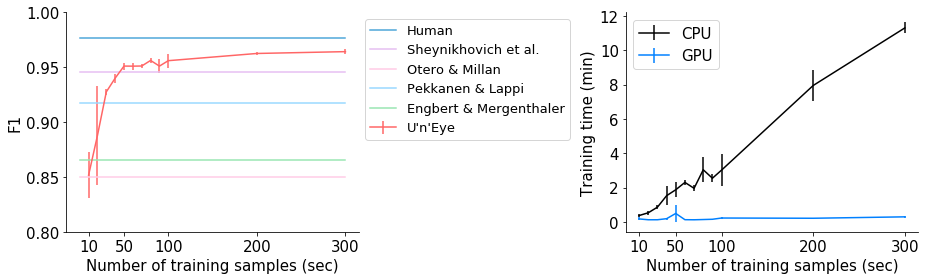

In [7]:
# test others 
folder_others = 'predictions_other_algorithms'

# SHeynikovich
Lshey = np.loadtxt(os.path.join(folder_others,'Sheynikhovich/dataset1_setA_Sheynikhovich_Labels.csv'),
                          delimiter=',')
true_pos,false_pos,false_neg,on_distance,off_distance = uneye.functions.accuracy(Labels.astype(float),Lshey.astype(float))
f1_shey = (2 * true_pos)/(2 * true_pos + false_neg + false_pos)
kappa_shey = cohenskappa(Labels.astype(float).flatten(),Lshey.astype(float).flatten())

# Otero-Millan
Lom = np.loadtxt(os.path.join(folder_others,'OteroMillan','dataset1setALabels.csv'),
                          delimiter=',')
true_pos,false_pos,false_neg,on_distance,off_distance = uneye.functions.accuracy(Labels.astype(float),Lom.astype(float))
f1_om = (2 * true_pos)/(2 * true_pos + false_neg + false_pos)
kappa_om = cohenskappa(Labels.astype(float).flatten(),Lom.astype(float).flatten())

# for others use predictions loaded above:
# human
f1_human = np.mean(np.array(df3['f1'][df3['ID']=='dataset1'][df3['Algorithm']=='human']))

# NSLR-HMM
f1_nslr = np.mean(np.array(df3['f1'][df3['ID']=='dataset1'][df3['Algorithm']=='nslr-hmm']))

# EM
f1_em = np.mean(np.array(df3['f1'][df3['ID']=='dataset1'][df3['Algorithm']=='em_best_lambda_for_f1']))

##################################
# PLOT --------------------------
colors = [
    
    [0.3,0.65,0.85],
    [1,0.4,0.4],
    [0.6,0.9,0.7],
    [0.6,0.9,0.7],
    [1,0.8,0.9],
    [0.9,0.75,0.95],
    [0.6,0.85,1],
    [0.5,0.75,0.65]
]
import seaborn as sns

figure(figsize=(13,4))
ax = subplot(121)
errorbar(N,np.mean(np.median(F1,2),1),yerr=np.std(np.median(F1,2),1),lw=1.5,label="U'n'Eye",c=colors[1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ylim(0.8,1)
ylabel("F1",fontsize=15)
yticks(np.arange(0.8,1.01,0.05),fontsize=15)
xlabel('Number of training samples (sec)',fontsize=15)
yticks(fontsize=15)
xticks([10,50,100,200,300],['10','50','100','200','300'],fontsize=15)

# plot others
plot([0,300],[f1_human,f1_human],label='Human',c=colors[0])
plot([0,300],[f1_shey,f1_shey],label='Sheynikhovich et al.',c=colors[5])
plot([0,300],[f1_om,f1_om],label='Otero & Millan',c=colors[4])
plot([0,300],[f1_nslr,f1_nslr],label='Pekkanen & Lappi',c=colors[6])
plot([0,300],[f1_em,f1_em],label='Engbert & Mergenthaler',c=colors[3])
legend(fontsize=13,bbox_to_anchor=(1,1))

# Computation time
T_gpu = np.load('dataset1_trainingtime_gpu.npy') 
T_gpu /= 60
T = np.load('dataset1_trainingtime.npy')  
T /= 60
ax = subplot(122)
errorbar(N,np.mean(T,1),yerr=np.std(T,1),lw=1.5,c='k',label='CPU')
errorbar(N,np.mean(np.median(T_gpu,2),1),yerr=np.std(np.median(T_gpu,2),1),lw=1.5,c=[0,0.5,1],label='GPU')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
xlabel('Number of training samples (sec)',fontsize=15)
ylabel("Training time (min)",fontsize=15)
yticks(fontsize=15)
xticks([10,50,100,200,300],['10','50','100','200','300'],fontsize=15)
legend(fontsize=15)
tight_layout()
#savefig('ntraining_f1.pdf')
show()

# inter-rater comparison

In [9]:
#load weights from 10-fold cross validation, either trained with labels from coder 1 and coder 2 and evaluate
# their performance on labels from both coders
import uneye
import numpy as np
import os

import pandas as pd
import numpy as np
K = 10
df = pd.DataFrame(columns=['training','test','fold','kappa','f1','on_dist','off_dist'])
f = 'dataset1'
datapath = os.path.join('../data',f)
sampfreq = 1000
min_dist = 10
min_sacc_dur = 6
ntrain = 950
weights = ['crossvalidation/dataset1/crossvalidation_','crossvalidation/dataset1_coder2/crossvalidation_']
coders = 2

# load training data
X = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq)+'hz_X_setA.csv',delimiter=',')
Y = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq)+'hz_Y_setA.csv',delimiter=',')
L1 = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq)+'hz_Labels_setA.csv',delimiter=',')
L2 = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq)+'hz_Labels2_setA.csv',delimiter=',')
np.random.seed(1)
randind = np.random.permutation(X.shape[0])
# used as training data
Xtrain = X[randind[:ntrain],:]
Ytrain = Y[randind[:ntrain],:]
Ltrain1 = L1[randind[:ntrain],:]
Ltrain2 = L2[randind[:ntrain],:]

# chose subset that was not used for training for each crossvalidation
n_test = int(ntrain/K)
np.random.seed(1) # fixed seed for comparable cross validations
indices = np.random.permutation(ntrain)
    
    
for j,w in enumerate(weights):
    for c in range(1,coders+1):

        if c==1:
            L = L1.copy()
            # load labels fro coder1
        else:
            L = L2.copy()
            # load labels from coder2
        Ltrain = L[randind[:ntrain],:]
        
         
        for i in range(K):
            if i==K-1:
                ind_test = indices[n_test*i:]
            else:
                ind_test = indices[n_test*i:n_test*(i+1)]
            # test set
            Xtest = Xtrain[ind_test,:].copy()
            Ytest = Ytrain[ind_test,:].copy()
            Ltest = Ltrain[ind_test,:].copy()
            
            # test network with given weights on labels from given coder
            model = uneye.DNN(weights_name=w+str(i),
                            min_sacc_dur = min_sacc_dur, min_sacc_dist = min_dist,
                            sampfreq = sampfreq)
            pred,prob,perf = model.test(Xtest,Ytest,Ltest)
            
    
            df = df.append({'training':'coder '+str(j+1),
                            'test':'coder '+str(c),
                            'fold':i,
                            'kappa':perf['kappa'],
                            'f1':perf['f1'],
                            'on_dist':np.mean(np.abs(perf['on'])),
                            'off_dist':np.mean(np.abs(perf['off']))},ignore_index=True) 
    
df2 = pd.DataFrame(columns=['training','test','kappa_m','kappa_std','f1_m','f1_std',
                            'on_dist_m','on_dist_std',
                            'off_dist_m','off_dist_std'])

# average over crossvalidations
for j in range(2):
    for c in range(2):
        df_sub = df[df['training']=='coder '+str(j+1)]
        df_sub = df_sub[df_sub['test']=='coder '+str(c+1)]
        df2 = df2.append({'training':'coder '+str(j+1),
                      'test':'coder '+str(c+1),
                     'kappa_m':df_sub['kappa'].mean(),
                      'kappa_std':df_sub['kappa'].std(),
                      'f1_m':df_sub['f1'].mean(),
                      'f1_std':df_sub['f1'].std(),
                      'on_dist_m':np.abs(df_sub['on_dist']).mean(),
                      'on_dist_std':np.abs(df_sub['on_dist']).std(),
                      'off_dist_m':np.abs(df_sub['off_dist']).mean(),
                      'off_dist_std':np.abs(df_sub['off_dist']).std(),
                     },ignore_index=True)
    
print("Performance of network trained on same or different coder")
display(df2)

print("Agreement of coder 1 and 2")
print('average:')
display(df_human.mean())
print('std:')
display(df_human.std())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:1946: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


Binary Cohens Kappa:  0.884
F1: 0.962
Binary Cohens Kappa:  0.905
F1: 0.966
Binary Cohens Kappa:  0.881
F1: 0.953
Binary Cohens Kappa:  0.899
F1: 0.977
Binary Cohens Kappa:  0.871
F1: 0.949
Binary Cohens Kappa:  0.899
F1: 0.947
Binary Cohens Kappa:  0.855
F1: 0.953
Binary Cohens Kappa:  0.903
F1: 0.973
Binary Cohens Kappa:  0.904
F1: 0.965
Binary Cohens Kappa:  0.915
F1: 0.978
Binary Cohens Kappa:  0.87
F1: 0.973
Binary Cohens Kappa:  0.869
F1: 0.961
Binary Cohens Kappa:  0.867
F1: 0.957
Binary Cohens Kappa:  0.858
F1: 0.975
Binary Cohens Kappa:  0.837
F1: 0.955
Binary Cohens Kappa:  0.858
F1: 0.95
Binary Cohens Kappa:  0.84
F1: 0.966
Binary Cohens Kappa:  0.876
F1: 0.973
Binary Cohens Kappa:  0.85
F1: 0.963
Binary Cohens Kappa:  0.877
F1: 0.976
Binary Cohens Kappa:  0.848
F1: 0.953
Binary Cohens Kappa:  0.871
F1: 0.956
Binary Cohens Kappa:  0.843
F1: 0.943
Binary Cohens Kappa:  0.872
F1: 0.969
Binary Cohens Kappa:  0.844
F1: 0.938
Binary Cohens Kappa:  0.846
F1: 0.952
Binary Cohens Ka

,training,test,kappa_m,kappa_std,f1_m,f1_std,on_dist_m,on_dist_std,off_dist_m,off_dist_std
0,coder 1,coder 1,0.891790,0.018429,0.962253,0.011673,2.656528,0.338675,4.108999,0.407164
1,coder 1,coder 2,0.860276,0.014134,0.964678,0.009318,2.823928,0.320112,6.566846,0.530747
2,coder 2,coder 1,0.854497,0.014561,0.955137,0.012211,3.344312,0.339619,5.584497,0.329540
3,coder 2,coder 2,0.891483,0.009442,0.961543,0.008577,1.991789,0.111865,4.807467,0.332013


Agreement of coder 1 and 2
average:


kappa       0.830330
f1          0.976668
on_dist     3.720502
off_dist    7.096277
dtype: float64

std:


kappa       0.024396
f1          0.012294
on_dist     0.386146
off_dist    0.336636
dtype: float64

In [10]:
import scipy.stats as stats
import statsmodels.stats.multitest as multitest
# test significance of difference between inter-coder and net-coder performance
# Network trained on Coder 1, tested on Coder 1 vs. Inter-rater agreement
df_stat = pd.DataFrame(columns=['score','var1','var2','test','statistic','p'])
values = ['kappa','f1','on_dist','off_dist']

for v in values:
    for j in range(1,3):
        
        df_sub = df[df['training']=='coder '+str(j)]
        df_sub = df_sub[df_sub['test']=='coder '+str(j)]
        net = np.array(df_sub[v])
        hum = np.array(df_human[v])
        if ((v=='kappa') or (v=='f1')):
            t,p = stats.ttest_rel(hum,net)
            test = 'paired t-test'
        elif ((v=='on_dist') or (v=='off_dist')):
            t,p = stats.ttest_ind(hum,net)
            test = 'independent t-test'
        df_stat = df_stat.append({'score':v,
                                     'var1':'net'+str(j)+'coder'+str(j),
                                     'var2':'inter-human',
                                     'test':test,
                                     'statistic':t,
                                     'p':p},ignore_index=True)
            
display(df_stat)
print('Bonferroni alpha=',0.05/8)
reject,p_corr,_,_ = multitest.multipletests(np.array(df_stat['p']),method='bonferroni')
print(reject,p_corr)

,score,var1,var2,test,statistic,p
0,kappa,net1coder1,inter-human,paired t-test,-18.378809,1.911118e-08
1,kappa,net2coder2,inter-human,paired t-test,-10.875300,1.772283e-06
2,f1,net1coder1,inter-human,paired t-test,3.536609,6.347782e-03
3,f1,net2coder2,inter-human,paired t-test,3.522532,6.489585e-03
4,on_dist,net1coder1,inter-human,independent t-test,6.550676,3.722120e-06
5,on_dist,net2coder2,inter-human,independent t-test,13.597914,6.579713e-11
6,off_dist,net1coder1,inter-human,independent t-test,17.880950,6.596262e-13
7,off_dist,net2coder2,inter-human,independent t-test,15.307920,9.170369e-12


Bonferroni alpha= 0.00625
[ True  True False False  True  True  True  True] [1.52889422e-07 1.41782624e-05 5.07822555e-02 5.19166840e-02
 2.97769584e-05 5.26377015e-10 5.27700926e-12 7.33629481e-11]


In [11]:
print(df_stat)
reject,p_corr,_,_ = multitest.multipletests(np.array(df_stat['p']),method='bonferroni')
print(reject,p_corr)

      score        var1         var2                test  statistic  \
0     kappa  net1coder1  inter-human       paired t-test -18.378809   
1     kappa  net2coder2  inter-human       paired t-test -10.875300   
2        f1  net1coder1  inter-human       paired t-test   3.536609   
3        f1  net2coder2  inter-human       paired t-test   3.522532   
4   on_dist  net1coder1  inter-human  independent t-test   6.550676   
5   on_dist  net2coder2  inter-human  independent t-test  13.597914   
6  off_dist  net1coder1  inter-human  independent t-test  17.880950   
7  off_dist  net2coder2  inter-human  independent t-test  15.307920   

              p  
0  1.911118e-08  
1  1.772283e-06  
2  6.347782e-03  
3  6.489585e-03  
4  3.722120e-06  
5  6.579713e-11  
6  6.596262e-13  
7  9.170369e-12  
[ True  True False False  True  True  True  True] [1.52889422e-07 1.41782624e-05 5.07822555e-02 5.19166840e-02
 2.97769584e-05 5.26377015e-10 5.27700926e-12 7.33629481e-11]


# missing labels

Networks trained on either dataset 1 or simulated data with certain percentage of missing saccade labels

In [12]:
import uneye
import numpy as np
from matplotlib.pyplot import *
from simulate import *

# simulated data
# simulate test set with N=1000 sec
np.random.seed(200)
N = 1000
X,Y,L = generate_eye_traces(N,min_amp=.5,max_amp=60)
X,Y = add_noise(X,Y,0.02)

N = [50,100,500] #number of training samples
rep = 10 #number of repetitions per training sample number
pc = [0,0.1,0.2,0.3,0.4] #percentage removed saccades during training

F1 = np.zeros((len(N),rep,len(pc)))
Kappa = np.zeros((len(N),rep,len(pc)))
for i,n in enumerate(N):
    for r in range(rep):
        for j,p in enumerate(pc):
            model = uneye.DNN(weights_name = "simu_N%s_p%s_%s" %(n,p,r),min_sacc_dur=10,min_sacc_dist=6)
            _,_,perf = model.test(X,Y,L)
            F1[i,r,j] = perf['f1']
            Kappa[i,r,j] = perf['kappa']

# dataset 1: load networks trained on setB and evaluate performance on setA.
X = np.loadtxt('../data/dataset1/dataset1_1000hz_X_setA.csv',delimiter=',')
Y = np.loadtxt('../data/dataset1/dataset1_1000hz_Y_setA.csv',delimiter=',')
L = np.loadtxt('../data/dataset1/dataset1_1000hz_Labels_setA.csv',delimiter=',')
F1_d1 = np.zeros((3,len(pc)))
Kappa_d1 = np.zeros((3,len(pc)))
for r in range(3):
    for j,p in enumerate(pc):
        model = uneye.DNN(weights_name = "dataset1_N300_p%s_%s" %(p,r),min_sacc_dur=10,min_sacc_dist=6)
        _,_,perf = model.test(X,Y,L)
        F1_d1[r,j] = perf['f1']
        Kappa_d1[r,j] = perf['kappa']


Binary Cohens Kappa:  0.954
F1: 0.976
Binary Cohens Kappa:  0.901
F1: 0.952
Binary Cohens Kappa:  0.912
F1: 0.957
Binary Cohens Kappa:  0.649
F1: 0.854
Binary Cohens Kappa:  0.408
F1: 0.626
Binary Cohens Kappa:  0.958
F1: 0.975
Binary Cohens Kappa:  0.923
F1: 0.961
Binary Cohens Kappa:  0.896
F1: 0.935
Binary Cohens Kappa:  0.808
F1: 0.863
Binary Cohens Kappa:  0.72
F1: 0.821
Binary Cohens Kappa:  0.963
F1: 0.977
Binary Cohens Kappa:  0.941
F1: 0.964
Binary Cohens Kappa:  0.88
F1: 0.93
Binary Cohens Kappa:  0.802
F1: 0.867
Binary Cohens Kappa:  0.705
F1: 0.812
Binary Cohens Kappa:  0.955
F1: 0.975
Binary Cohens Kappa:  0.934
F1: 0.964
Binary Cohens Kappa:  0.905
F1: 0.945
Binary Cohens Kappa:  0.803
F1: 0.866
Binary Cohens Kappa:  0.755
F1: 0.847
Binary Cohens Kappa:  0.953
F1: 0.976
Binary Cohens Kappa:  0.94
F1: 0.963
Binary Cohens Kappa:  0.901
F1: 0.933
Binary Cohens Kappa:  0.799
F1: 0.887
Binary Cohens Kappa:  0.7
F1: 0.802
Binary Cohens Kappa:  0.963
F1: 0.985
Binary Cohens Kapp

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:1946: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


Binary Cohens Kappa:  0.876
F1: 0.97
Binary Cohens Kappa:  0.841
F1: 0.953
Binary Cohens Kappa:  0.852
F1: 0.955
Binary Cohens Kappa:  0.793
F1: 0.919
Binary Cohens Kappa:  0.682
F1: 0.839
Binary Cohens Kappa:  0.882
F1: 0.961
Binary Cohens Kappa:  0.867
F1: 0.956
Binary Cohens Kappa:  0.839
F1: 0.946
Binary Cohens Kappa:  0.847
F1: 0.951
Binary Cohens Kappa:  0.764
F1: 0.906
Binary Cohens Kappa:  0.879
F1: 0.968
Binary Cohens Kappa:  0.85
F1: 0.959
Binary Cohens Kappa:  0.847
F1: 0.955
Binary Cohens Kappa:  0.829
F1: 0.951
Binary Cohens Kappa:  0.612
F1: 0.795


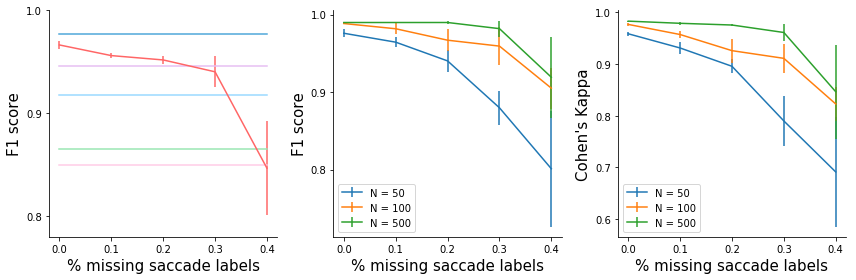

In [13]:
# test others 
folder_others = 'predictions_other_algorithms'

# SHeynikovich
Lshey = np.loadtxt(os.path.join(folder_others,'Sheynikhovich/dataset1_setA_Sheynikhovich_Labels.csv'),
                          delimiter=',')
true_pos,false_pos,false_neg,on_distance,off_distance = uneye.functions.accuracy(L.astype(float),Lshey.astype(float))
f1_shey = (2 * true_pos)/(2 * true_pos + false_neg + false_pos)

# Otero-Millan
Lom = np.loadtxt(os.path.join(folder_others,'OteroMillan','dataset1setALabels.csv'),
                          delimiter=',')
true_pos,false_pos,false_neg,on_distance,off_distance = uneye.functions.accuracy(L.astype(float),Lom.astype(float))
f1_om = (2 * true_pos)/(2 * true_pos + false_neg + false_pos)

# NSLR-HMM
f1_nslr = np.mean(np.array(df3['f1'][df3['ID']=='dataset1'][df3['Algorithm']=='nslr-hmm']))

# EM
f1_em = np.mean(np.array(df3['f1'][df3['ID']=='dataset1'][df3['Algorithm']=='em_best_lambda_for_f1']))

# Human
f1_human = np.mean(np.array(df3['f1'][df3['ID']=='dataset1'][df3['Algorithm']=='human']))

# plot
N = [50,100,500] #number of training samples
rep = 5 #number of repetitions per training sample number
pc = [0,0.1,0.2,0.3,0.4]

colors = [
    
    [0.3,0.65,0.85],
    [1,0.4,0.4],
    [0.6,0.9,0.7],
    [0.6,0.9,0.7],
    [1,0.8,0.9],
    [0.9,0.75,0.95],
    [0.6,0.85,1],
    [0.5,0.75,0.65]
]

figure(figsize=(12,4))
# dataset 1
# plot others
ax = subplot(131)

plot([0,0.4],[f1_human,f1_human],label='Human',c=colors[0])
plot([0,0.4],[f1_shey,f1_shey],label='Sheynikhovich et al.',c=colors[5])
plot([0,0.4],[f1_om,f1_om],label='Otero & Millan',c=colors[4])
plot([0,0.4],[f1_nslr,f1_nslr],label='Pekkanen & Lappi',c=colors[6])
plot([0,0.4],[f1_em,f1_em],label='Engbert & Mergenthaler',c=colors[3])


# plot U'n'Eye
errorbar(pc,np.mean(F1_d1,0),yerr=np.std(F1_d1,0),lw=1.5,label="U'n'Eye",c=colors[1])
ylabel('F1 score',fontsize=15)
xlabel('% missing saccade labels',fontsize=15)
ylim(0.78,1)
yticks([0.8,0.9,1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#legend(fontsize=13,bbox_to_anchor=(1,1))

# simulated data
ax = subplot(132)
for i,n in enumerate(N):
    errorbar(pc,np.mean(F1[i,:,:],0),yerr=np.std(F1[i,:,:],0),lw=1.5,label="N = %s" %n)
legend()
ylabel('F1 score',fontsize=15)
xlabel('% missing saccade labels',fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
yticks([0.8,0.9,1])
ax = subplot(133)
for i,n in enumerate(N):
    errorbar(pc,np.mean(Kappa[i,:,:],0),yerr=np.std(Kappa[i,:,:],0),lw=1.5,label="N = %s" %n)
legend()
ylabel("Cohen's Kappa",fontsize=15)
xlabel('% missing saccade labels',fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
yticks([0.6,0.7,0.8,0.9,1])
tight_layout()
#savefig('missing_labels.pdf',bbox_inches='tight')
show()